# 📊 Análise de Ocorrências Internas - Seguradora de Convênio Médico

In [9]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [10]:

df = pd.read_csv('dados_ocorrencias_seguradora.csv')
df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'])
df.head()


,data_ocorrencia,tipo_problema,tempo_resolucao,canal_entrada,classificacao,responsavel_setor,cliente_reincidente
0,2024-06-12,erro sistema,7,telefone,média,Setor A,não
1,2024-01-29,cancelamento indevido,5,telefone,média,Setor C,não
2,2024-01-07,atraso na resposta,6,app,crítica,Setor A,sim
3,2024-03-11,cancelamento indevido,4,telefone,baixa,Setor A,não
4,2024-03-03,cancelamento indevido,5,presencial,baixa,Setor A,sim


In [11]:
print(df.info())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_ocorrencia      500 non-null    datetime64[ns]
 1   tipo_problema        500 non-null    object        
 2   tempo_resolucao      500 non-null    int64         
 3   canal_entrada        500 non-null    object        
 4   classificacao        500 non-null    object        
 5   responsavel_setor    500 non-null    object        
 6   cliente_reincidente  500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 27.5+ KB
None


,data_ocorrencia,tipo_problema,tempo_resolucao,canal_entrada,classificacao,responsavel_setor,cliente_reincidente
count,500,500,500.000000,500,500,500,500
unique,NaN,5,NaN,4,3,3,2
top,NaN,erro sistema,NaN,telefone,baixa,Setor B,não
freq,NaN,112,NaN,138,245,175,346
mean,2024-03-27 23:39:50.400000256,NaN,4.500000,NaN,NaN,NaN,NaN
min,2024-01-01 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN
25%,2024-02-10 00:00:00,NaN,3.000000,NaN,NaN,NaN,NaN
50%,2024-03-23 12:00:00,NaN,4.000000,NaN,NaN,NaN,NaN
75%,2024-05-17 00:00:00,NaN,6.000000,NaN,NaN,NaN,NaN
max,2024-06-29 00:00:00,NaN,11.000000,NaN,NaN,NaN,NaN


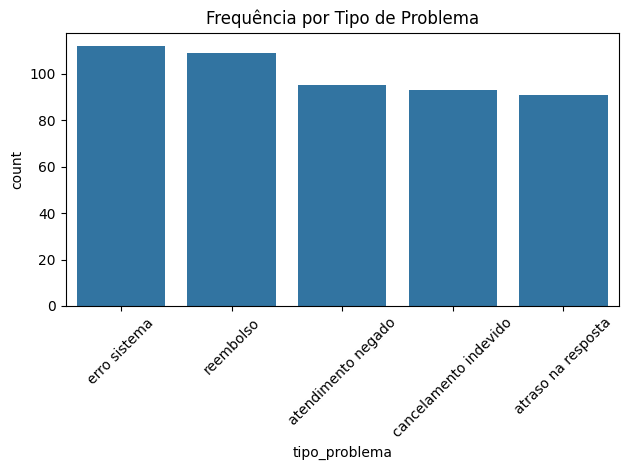

In [12]:

sns.countplot(data=df, x='tipo_problema', order=df['tipo_problema'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Frequência por Tipo de Problema')
plt.tight_layout()
plt.show()


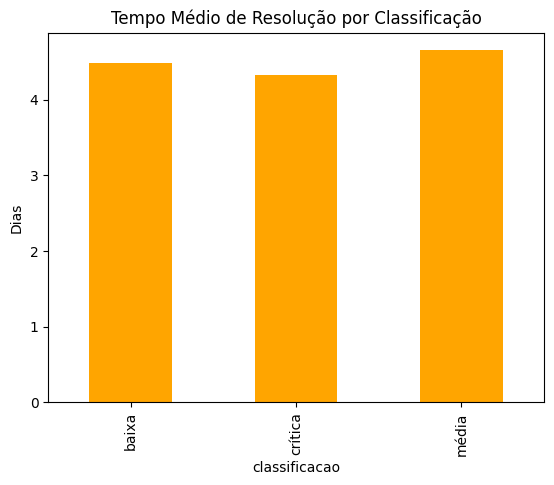

In [13]:

df.groupby('classificacao')['tempo_resolucao'].mean().plot(kind='bar', color='orange')
plt.title('Tempo Médio de Resolução por Classificação')
plt.ylabel('Dias')
plt.show()


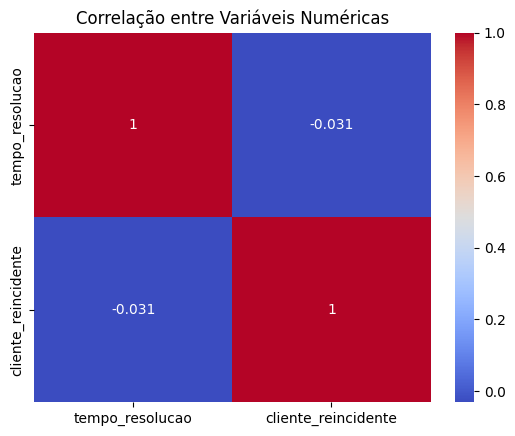

In [14]:

df_encoded = df.copy()
df_encoded['cliente_reincidente'] = df_encoded['cliente_reincidente'].map({'sim': 1, 'não': 0})
sns.heatmap(df_encoded[['tempo_resolucao', 'cliente_reincidente']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()


In [16]:
df_ml = df_encoded.copy()
# Separar a variável target antes de aplicar get_dummies
y = df_ml['classificacao']
# Aplicar get_dummies apenas nas variáveis features, excluindo data_ocorrencia, responsavel_setor e classificacao
X = pd.get_dummies(df_ml.drop(['data_ocorrencia', 'responsavel_setor', 'classificacao'], axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [17]:

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

       baixa       0.52      0.52      0.52        73
     crítica       0.21      0.29      0.24        31
       média       0.26      0.20      0.23        46

    accuracy                           0.37       150
   macro avg       0.33      0.34      0.33       150
weighted avg       0.38      0.37      0.37       150



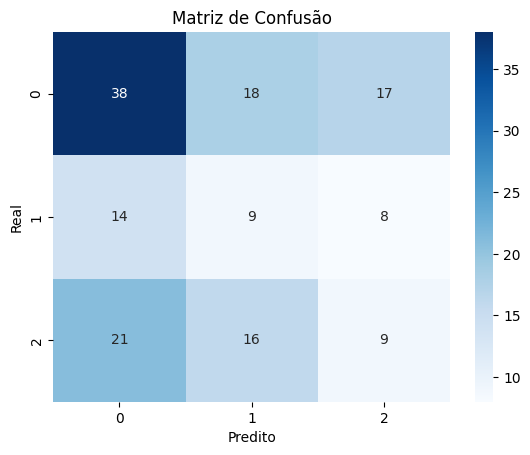

In [18]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


In [19]:

df.to_csv('dados_ocorrencias_formatado.csv', index=False)
print('Arquivo exportado com sucesso.')


Arquivo exportado com sucesso.


## 🔍 Análise da Performance e Teste de Outros Modelos

A performance do RandomForest foi baixa (37% de acurácia). Vamos testar outros algoritmos e técnicas de melhoria.

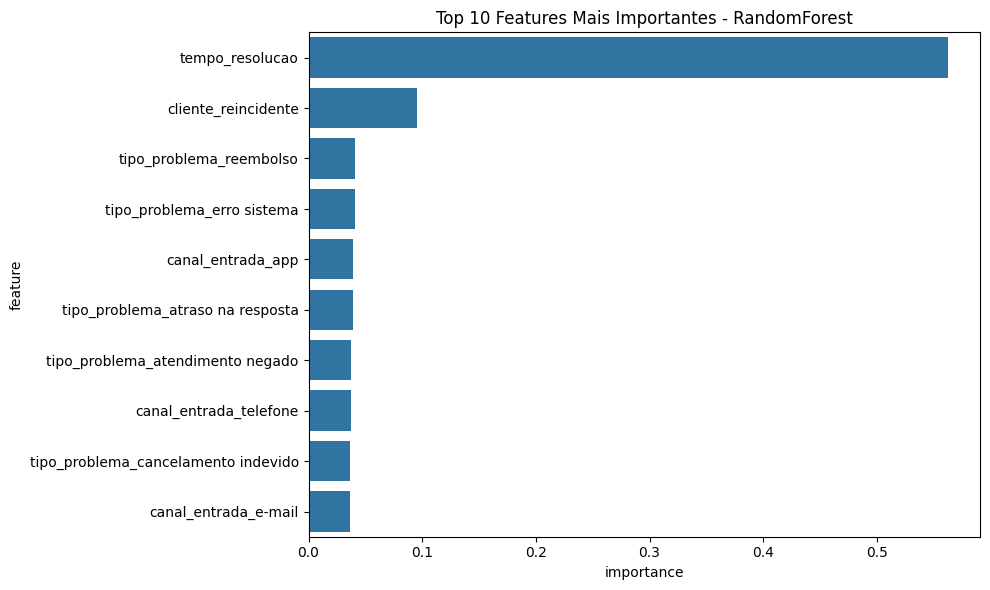

Features mais importantes:
                                feature  importance
0                       tempo_resolucao    0.562643
1                   cliente_reincidente    0.095600
6               tipo_problema_reembolso    0.040803
5            tipo_problema_erro sistema    0.040582
7                     canal_entrada_app    0.039448
3      tipo_problema_atraso na resposta    0.039262
2      tipo_problema_atendimento negado    0.037528
10               canal_entrada_telefone    0.037051
4   tipo_problema_cancelamento indevido    0.036258
8                  canal_entrada_e-mail    0.036242


In [20]:
# Vamos primeiro analisar a importância das features no RandomForest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': modelo.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Features Mais Importantes - RandomForest')
plt.tight_layout()
plt.show()

print("Features mais importantes:")
print(feature_importance.head(10))

Random Forest: 0.407
Gradient Boosting: 0.453
SVM: 0.487
Logistic Regression: 0.467
KNN: 0.387


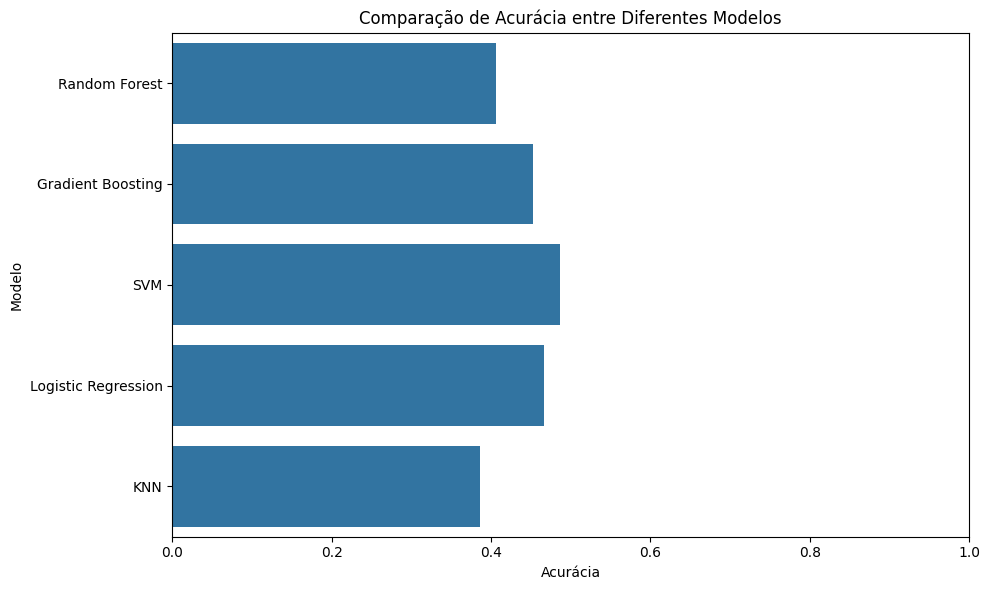

In [21]:
# Testando diferentes algoritmos
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Dicionário com diferentes modelos
modelos = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier()
}

# Testando cada modelo
resultados = {}
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    resultados[nome] = accuracy
    print(f"{nome}: {accuracy:.3f}")

# Visualizando os resultados
resultados_df = pd.DataFrame(list(resultados.items()), columns=['Modelo', 'Acurácia'])
plt.figure(figsize=(10, 6))
sns.barplot(data=resultados_df, x='Acurácia', y='Modelo')
plt.title('Comparação de Acurácia entre Diferentes Modelos')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

In [22]:
# Melhorando o RandomForest com hiperparâmetros
rf_melhorado = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'  # Para lidar com desbalanceamento
)

rf_melhorado.fit(X_train, y_train)
y_pred_melhorado = rf_melhorado.predict(X_test)

print('Relatório de Classificação - RandomForest Melhorado:')
print(classification_report(y_test, y_pred_melhorado))

# Comparando com o modelo original
print(f"\nComparação:")
print(f"RandomForest Original: {accuracy_score(y_test, y_pred):.3f}")
print(f"RandomForest Melhorado: {accuracy_score(y_test, y_pred_melhorado):.3f}")

Relatório de Classificação - RandomForest Melhorado:
              precision    recall  f1-score   support

       baixa       0.53      0.38      0.44        73
     crítica       0.19      0.35      0.25        31
       média       0.30      0.26      0.28        46

    accuracy                           0.34       150
   macro avg       0.34      0.33      0.32       150
weighted avg       0.39      0.34      0.35       150


Comparação:
RandomForest Original: 0.387
RandomForest Melhorado: 0.340


In [23]:
# Analisando possíveis problemas nos dados
print("Distribuição das classes na variável target:")
print(y.value_counts())
print(f"\nPercentual por classe:")
print(y.value_counts(normalize=True) * 100)

print(f"\nNúmero de features: {X.shape[1]}")
print(f"Número de amostras: {X.shape[0]}")
print(f"Razão features/amostras: {X.shape[1]/X.shape[0]:.3f}")

# Verificando se há features com variância zero
variancia_zero = X.var() == 0
if variancia_zero.any():
    print(f"\nFeatures com variância zero: {X.columns[variancia_zero].tolist()}")
else:
    print("\nNenhuma feature com variância zero encontrada.")

Distribuição das classes na variável target:
classificacao
baixa      245
média      152
crítica    103
Name: count, dtype: int64

Percentual por classe:
classificacao
baixa      49.0
média      30.4
crítica    20.6
Name: proportion, dtype: float64

Número de features: 11
Número de amostras: 500
Razão features/amostras: 0.022

Nenhuma feature com variância zero encontrada.
